# Data Visualization, Cleaning & Prep For ML

This notebook will visualize the data to help us get a better understanding of how the variables interact with each other, and help us start thinking of what features will be useful for ML. 

This notebook will also clean the data and prepare it for ML by:
- rescaling if necessary
- one-hot encode categorical features
- visualize data before and after clean & prep

## 1 - Import Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display
import tabulate
import math
import scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

ModuleNotFoundError: No module named 'seaborn'

## 2 - Load Data

In [2]:
# test data
df_TE=pd.read_csv('test.csv')

# training data
df_TR=pd.read_csv('training.csv')
df_TR.head(3)

patient_id patient_race  payer_type patient_state  patient_zip3  \
0      475714          NaN    MEDICAID            CA           924   
1      349367        White  COMMERCIAL            CA           928   
2      138632        White  COMMERCIAL            TX           760   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           84              F    NaN                       C50919   
1           62              F  28.49                       C50411   
2           43              F  38.09                       C50112   

                        breast_cancer_diagnosis_desc  \
0  Malignant neoplasm of unsp site of unspecified...   
1  Malig neoplm of upper-outer quadrant of right ...   
2  Malignant neoplasm of central portion of left ...   

  metastatic_cancer_diagnosis_code metastatic_first_novel_treatment  \
0                            C7989                              NaN   
1                             C773                              NaN   
2                             C773                              NaN   

  metastatic_first_novel_treatment_type Region            Division  \
0                                   NaN   West             Pacific   
1                                   NaN   West             Pacific   
2                                   NaN  South  West South Central   

    population      density  age_median  age_under_10  age_10_to_19  \
0  31437.75000  1189.562500   30.642857     16.014286     15.542857   
1  39121.87879  2295.939394   38.200000     11.878788     13.354545   
2  21996.68333   626.236667   37.906667     13.028333     14.463333   

     age_20s    age_30s    age_40s    age_50s    age_60s   age_70s  \
0  17.614286  14.014286  11.614286  11.557143   7.571429  4.000000   
1  14.230303  13.418182  13.333333  14.060606  10.248485  5.951515   
2  12.531667  13.545000  12.860000  12.770000  11.426667  6.565000   

   age_over_80       male     female    married   divorced  never_married  \
0     2.100000  49.857143  50.142857  36.571429  11.885714      47.114286   
1     3.503030  49.893939  50.106061  50.245455   9.827273      35.290909   
2     2.811667  50.123333  49.876667  55.753333  12.330000      27.195000   

    widowed  family_size  family_dual_income  income_household_median  \
0  4.442857     3.928571           52.228571              52996.28571   
1  4.651515     3.622727           61.736364             102741.63640   
2  4.710000     3.260667           55.801667              85984.74138   

   income_household_under_5  income_household_5_to_10  \
0                  3.142857                  4.000000   
1                  2.327273                  1.536364   
2                  2.483333                  1.305000   

   income_household_10_to_15  income_household_15_to_20  \
0                   6.157143                   5.142857   
1                   2.648485                   2.178788   
2                   2.716667                   2.938333   

   income_household_20_to_25  income_household_25_to_35  \
0                   6.271429                  10.142857   
1                   2.409091                   5.163636   
2                   2.766667                   6.763333   

   income_household_35_to_50  income_household_50_to_75  \
0                  13.300000                  20.000000   
1                   7.972727                  13.936364   
2                  12.061667                  15.835000   

   income_household_75_to_100  income_household_100_to_150  \
0                   12.742857                    11.571429   
1                   12.469697                    19.760606   
2                   13.560000                    20.875000   

   income_household_150_over  income_household_six_figure  \
0                   7.528571                    19.100000   
1                  29.596970                    49.357576   
2                  18.680000                    39.555000   

   income_individual_median  home_ownership  housing

## 3 - Data Visualization

In [3]:
# Initialize an empty list to store the results
table=[]

# Iterate through each column in df_TR
for col in df_TR.columns:
    # Skip the target column
    if col == 'DiagPeriodL90D':
        continue
        
    properties=[]
    
    # Determine the data type of the column
    data_type = 'Categorical' if df_TR[col].dtype == 'object' else 'Numerical'
    properties.append(col)
    properties.append(data_type)
    
    # Get the unique values or range of values depending on the data type
    if data_type == 'Categorical':
        values = df_TR[col].unique()

    else:
        values = f'{df_TR[col].min()} to {df_TR[col].max()}'
        
    properties.append(values)
    
    # Append the information to the table (list)
    table.append(properties)
    
table_of_lists = [list(row) for row in table]

tabulate.tabulate(table_of_lists, tablefmt='html', headers=['Features', 'Data Type', 'Values'])

'<table>\n<thead>\n<tr><th>Features                             </th><th>Data Type  </th><th>Values                                            </th></tr>\n</thead>\n<tbody>\n<tr><td>patient_id                           </td><td>Numerical  </td><td>100063 to 999896                                  </td></tr>\n<tr><td>patient_race                         </td><td>Categorical</td><td>[nan &#x27;White&#x27; &#x27;Other&#x27; &#x27;Hispanic&#x27; &#x27;Asian&#x27; &#x27;Black&#x27;]  </td></tr>\n<tr><td>payer_type                           </td><td>Categorical</td><td>[&#x27;MEDICAID&#x27; &#x27;COMMERCIAL&#x27; &#x27;MEDICARE ADVANTAGE&#x27; nan]</td></tr>\n<tr><td>patient_state                        </td><td>Categorical</td><td>[&#x27;CA&#x27; &#x27;TX&#x27; &#x27;ID&#x27; &#x27;NY&#x27; &#x27;IL&#x27; nan &#x27;MI&#x27; &#x27;OR&#x27; &#x27;MT&#x27; &#x27;KY&#x27; &#x27;OH&#x27; &#x27;IN&#x27; &#x27;FL&#x27; &#x27;CO&#x27; &#x27;GA&#x27;\n &#x27;VA&#x27; &#x27;MD&#x27; &#x27;KS&#x27; &#x27;WI&#x27; &#x27;PA&#x27; &#x27;NM&#x27; &#x27;WA&#x27; &#x27;MN&#x27; &#x27;NC&#x27; &#x27;AL&#x27; &#x27;SC&#x27; &#x27;LA&#x27; &#x27;IA&#x27; &#x27;TN&#x27;\n &#x27;HI&#x27; &#x27;NE&#x27; &#x27;AZ&#x27; &#x27;MO&#x27; &#x27;NV&#x27; &#x27;SD&#x27; &#x27;DC&#x27; &#x27;AR&#x27; &#x27;UT&#x27; &#x27;WV&#x27; &#x27;ND&#x27; &#x27;OK&#x27; &#x27;WY&#x27; &#x27;DE&#x27;\n &#x27;NJ&#x27; &#x27;MS&#x27; &#x27;AK&#x27; &#x27;PR&#x27; &#x27;RI&#x27; &#x27;CT&#x27; &#x27;NH&#x27; &#x27;MA&#x27;]                                                   </td></tr>\n<tr><td>patient_zip3                         </td><td>Numerical  </td><td>101 to 999                                        </td></tr>\n<tr><td>patient_age                          </td><td>Numerical  </td><td>18 to 91                                          </td></tr>\n<tr><td>patient_gender                       </td><td>Categorical</td><td>[&#x27;F&#x27;]                                             </td></tr>\n<tr><td>bmi                                  </td><td>Numerical  </td><td>14.0 to 85.0                                      </td></tr>\n<tr><td>breast_cancer_diagnosis_code         </td><td>Categorical</td><td>[&#x27;C50919&#x27; &#x27;C50411&#x27; &#x27;C50112&#x27; &#x27;C50212&#x27; &#x27;1749&#x27; &#x27;C50912&#x27; &#x27;C50512&#x27; &#x27;1744&#x27;\n &#x27;C50412&#x27; &#x27;C50812&#x27; &#x27;C50911&#x27; &#x27;C50312&#x27; &#x27;C50311&#x27; &#x27;C50111&#x27; &#x27;1741&#x27; &#x27;C5091&#x27;\n &#x27;C50811&#x27; &#x27;1748&#x27; &#x27;C50511&#x27; &#x27;1743&#x27; &#x27;C50211&#x27; &#x27;C50011&#x27; &#x27;C5051&#x27; &#x27;C50012&#x27;\n &#x27;C50419&#x27; &#x27;1742&#x27; &#x27;C50611&#x27; &#x27;C50612&#x27; &#x27;C50119&#x27; &#x27;C50819&#x27; &#x27;1746&#x27; &#x27;C5041&#x27;\n &#x27;C50619&#x27; &#x27;19881&#x27; &#x27;C5081&#x27; &#x27;1745&#x27; &#x27;C50219&#x27; &#x27;C50319&#x27; &#x27;C50019&#x27; &#x27;C50519&#x27;\n &#x27;C50929&#x27; &#x27;C50021&#x27; &#x27;C5021&#x27; &#x27;C5011&#x27; &#x27;C5031&#x27; &#x27;C509&#x27; &#x27;C50&#x27; &#x27;1759&#x27; &#x27;C5001&#x27;\n &#x27;C50421&#x27;]                                                   </td></tr>\n<tr><td>breast_cancer_diagnosis_desc         </td><td>Categorical</td><td>[&#x27;Malignant neoplasm of unsp site of unspecified female breast&#x27;\n &#x27;Malig neoplm of upper-outer quadrant of right female breast&#x27;\n &#x27;Malignant neoplasm of central portion of left female breast&#x27;\n &#x27;Malig neoplasm of upper-inner quadrant of left female breast&#x27;\n &#x27;Malignant neoplasm of breast (female), unspecified&#x27;\n &#x27;Malignant neoplasm of unspecified site of left female breast&#x27;\n &#x27;Malig neoplasm of lower-outer quadrant of left female breast&#x27;\n &#x27;Malignant neoplasm of upper-outer quadrant of female breast&#x27;\n &#x27;Malig neoplasm of upper-outer quadrant of left female breast&#x27;\n &#x27;Malignant neoplasm of ovrlp sites of left female breast&#x27;\n &#x27;Malig

NameError: name 'sns' is not defined

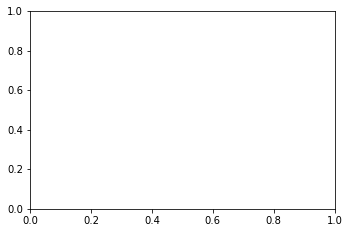

In [13]:
# Extract only the categorical columns
categorical_cols = df_TR.select_dtypes(include=['object']).columns

# Define the target column name
target_col = 'DiagPeriodL90D' 

# Filter the DataFrame for each class
df_0 = df_TR[df_TR[target_col] == 0]
df_1 = df_TR[df_TR[target_col] == 1]

# Create a grid of box plots for categorical columns for each class
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)  # Adjust the subplot layout based on the number of categorical columns
    sns.boxplot(x=col, y=target_col, data=df_0, label='0')
    sns.boxplot(x=col, y=target_col, data=df_1, color='orange', label='1')
    plt.title(f'Box Plot of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend()

plt.tight_layout()
plt.show()

### 3.1 - Viz w/o Categorical Variables

In [12]:
df_temp = pd.DataFrame()

num_df = pd.concat([df_TR, df_temp], axis = 1)

drop_cat_cols = [col for col in df_TR.columns if df_TR[col].dtype == 'object']
num_df.drop(drop_cat_cols, axis = 1, inplace = True)
num_df.drop('patient_id', axis = 1)
        
print(num_df.head(5))

   patient_id  patient_zip3  patient_age    bmi   population      density  \
0      475714           924           84    NaN  31437.75000  1189.562500   
1      349367           928           62  28.49  39121.87879  2295.939394   
2      138632           760           43  38.09  21996.68333   626.236667   
3      617843           926           45    NaN  32795.32558  1896.220930   
4      817482           836           55    NaN  10886.26000   116.886000   

   age_median  age_under_10  age_10_to_19    age_20s    age_30s    age_40s  \
0   30.642857     16.014286     15.542857  17.614286  14.014286  11.614286   
1   38.200000     11.878788     13.354545  14.230303  13.418182  13.333333   
2   37.906667     13.028333     14.463333  12.531667  13.545000  12.860000   
3   42.871429     10.071429     12.135714  12.538095  12.464286  12.650000   
4   43.473469     10.824000     13.976000   9.492000  10.364000  12.600000   

     age_50s    age_60s   age_70s  age_over_80       male     female

In [6]:
FeatNames=[]

for col in num_df.columns:
    if col != 'DiagPeriodL90D': # exclude target
        FeatNames.append(col)
        
print(FeatNames)

['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_degree', 'labor_force_participatio

In [7]:
df_1 = num_df[num_df.DiagPeriodL90D==1] # success
df_0 = num_df[num_df.DiagPeriodL90D==0] # fail

patient_id


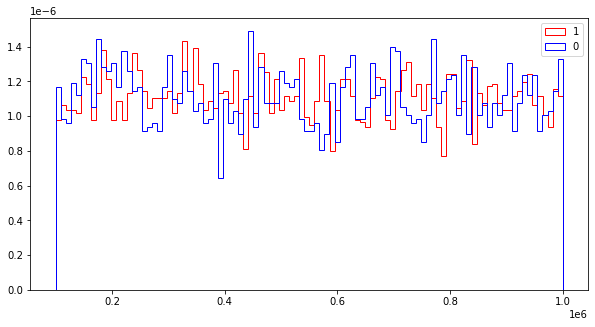

patient_zip3


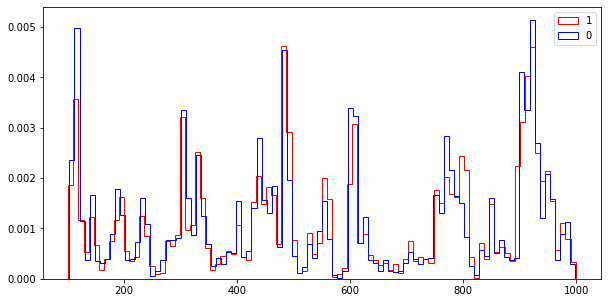

patient_age


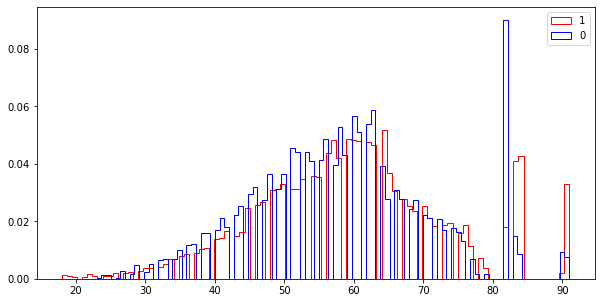

bmi


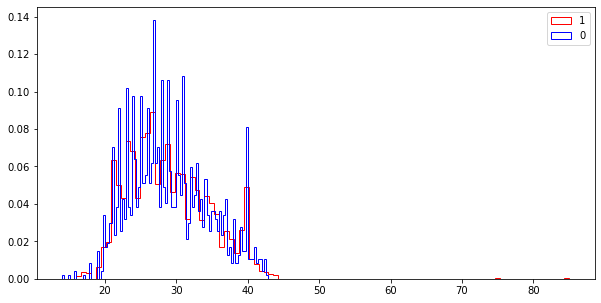

population


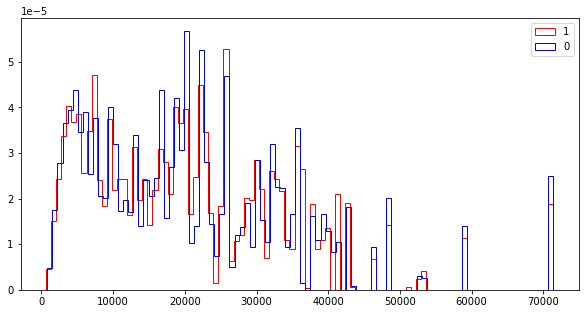

density


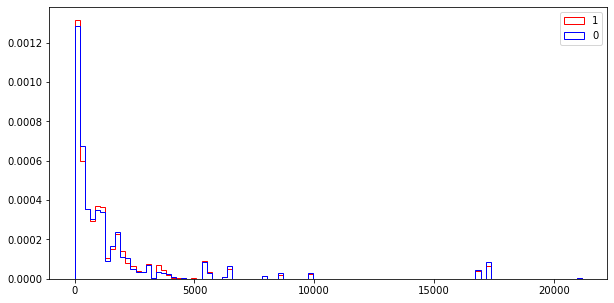

age_median


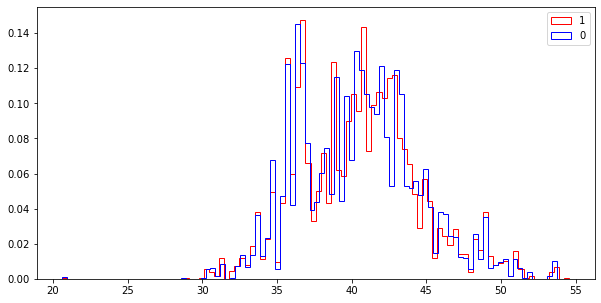

age_under_10


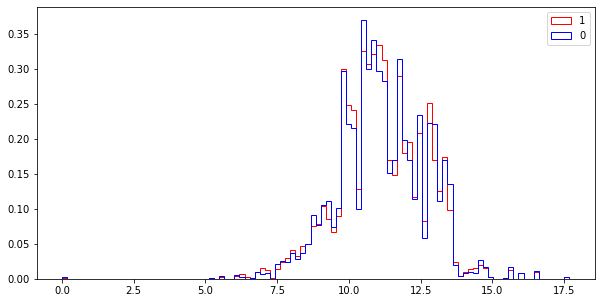

age_10_to_19


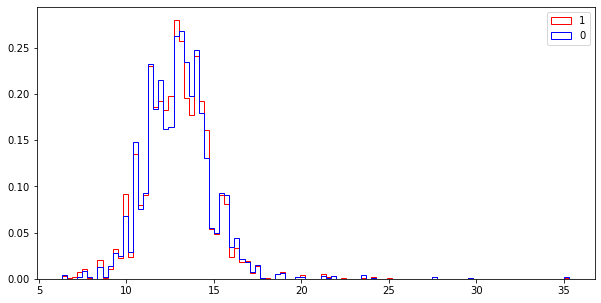

age_20s


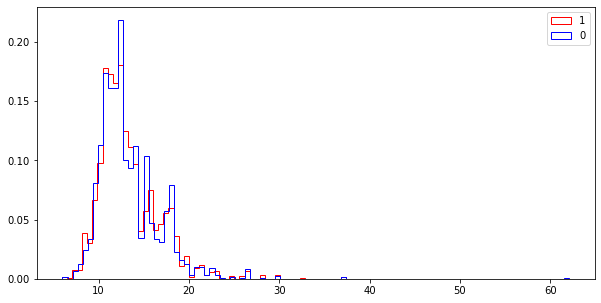

age_30s


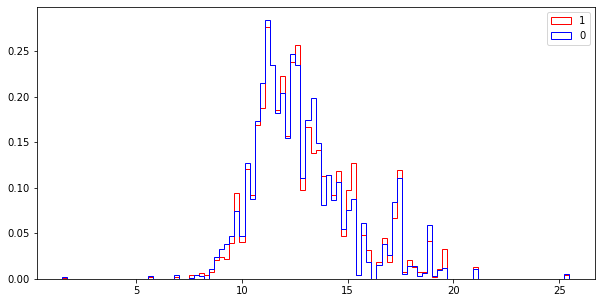

age_40s


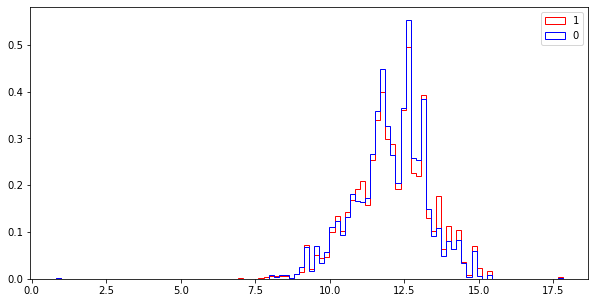

age_50s


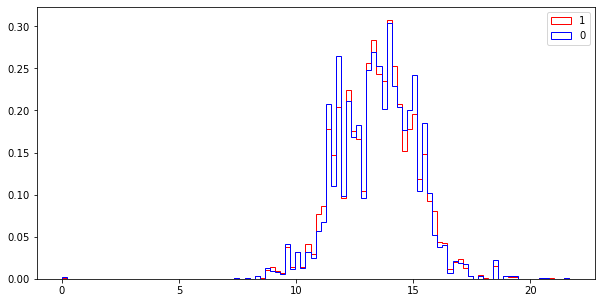

age_60s


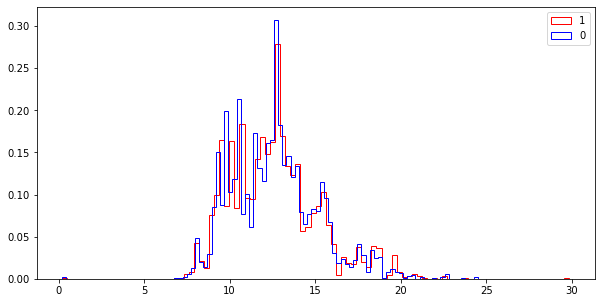

age_70s


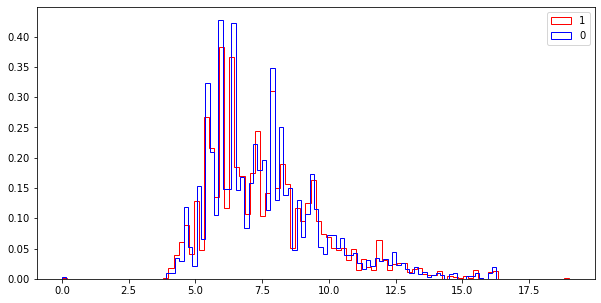

age_over_80


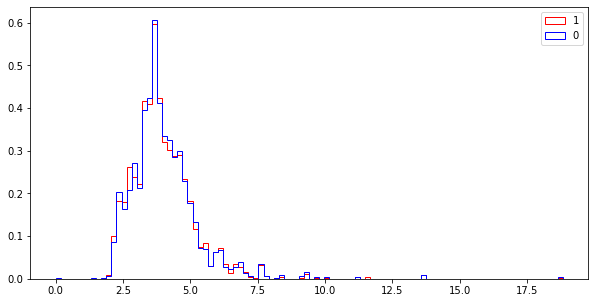

male


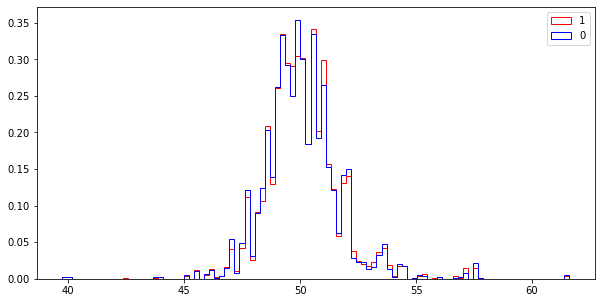

female


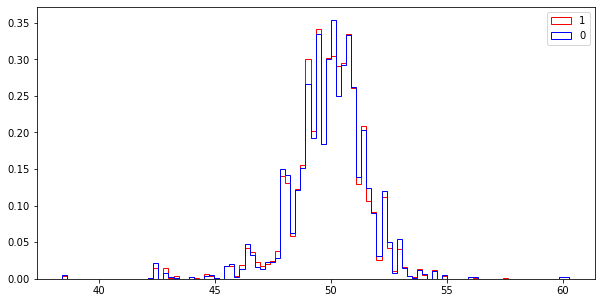

married


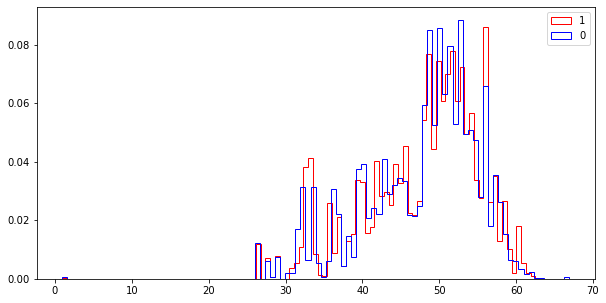

divorced


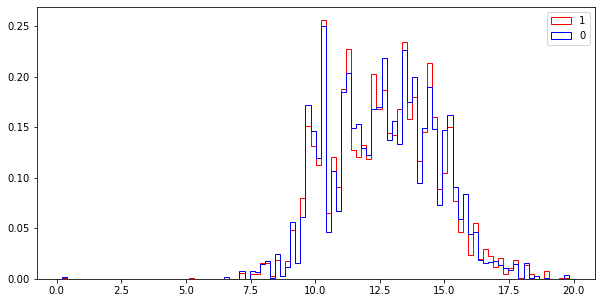

never_married


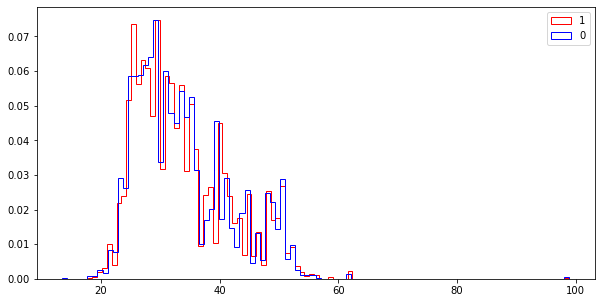

widowed


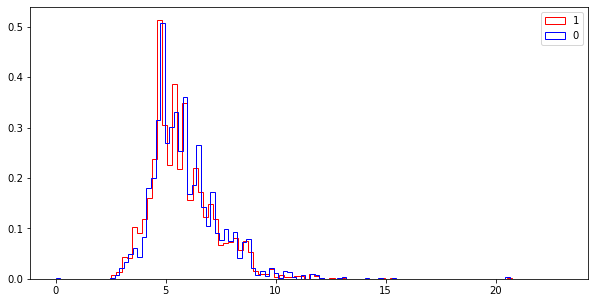

family_size


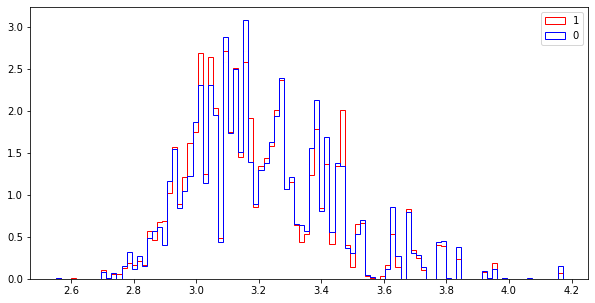

family_dual_income


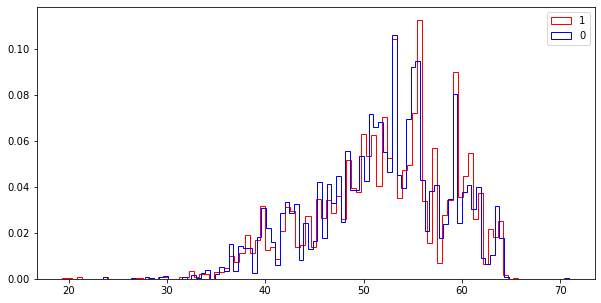

income_household_median


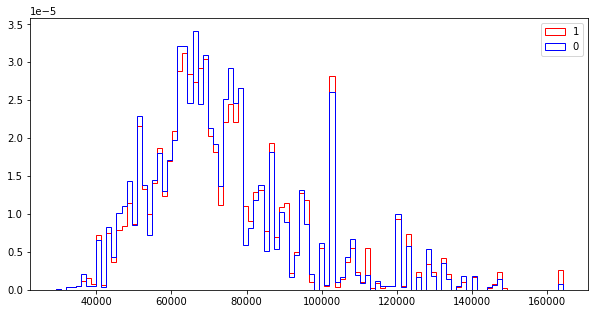

income_household_under_5


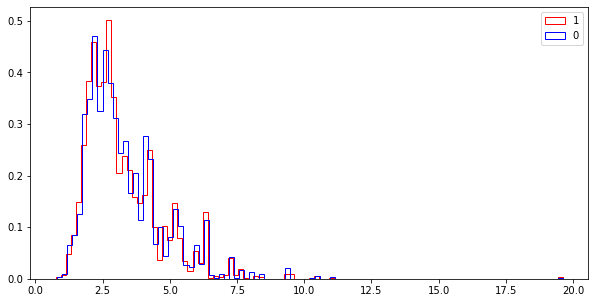

income_household_5_to_10


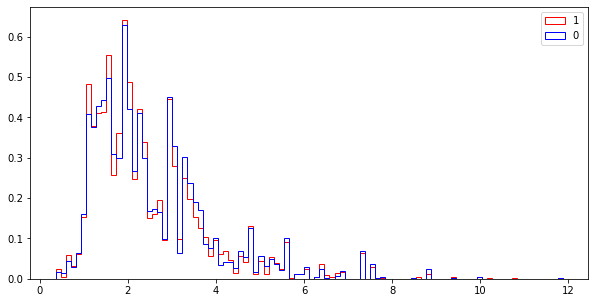

income_household_10_to_15


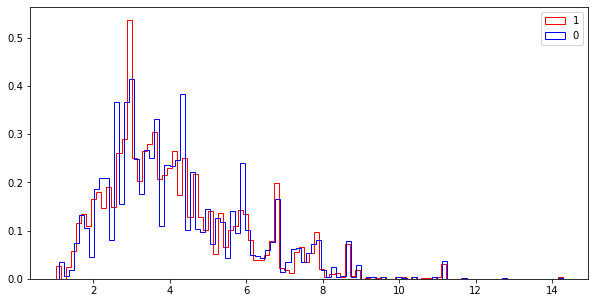

income_household_15_to_20


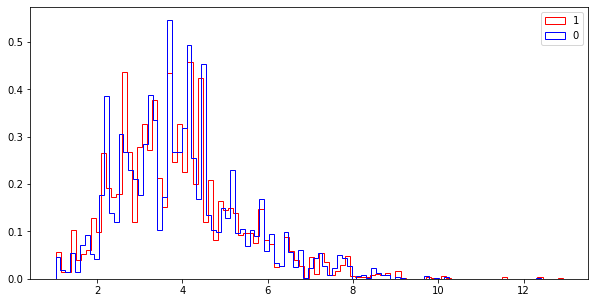

income_household_20_to_25


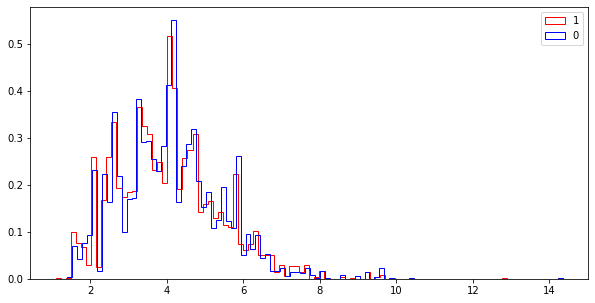

income_household_25_to_35


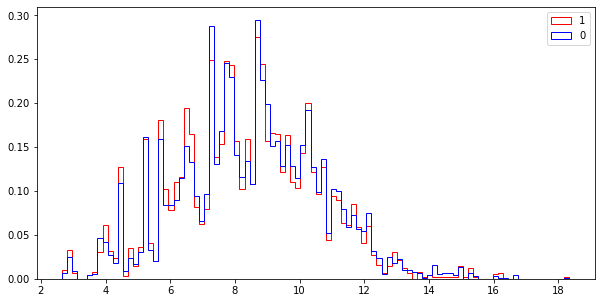

income_household_35_to_50


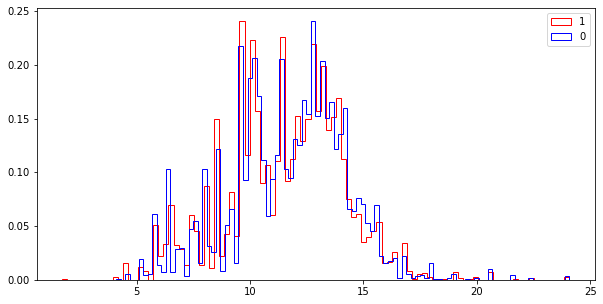

income_household_50_to_75


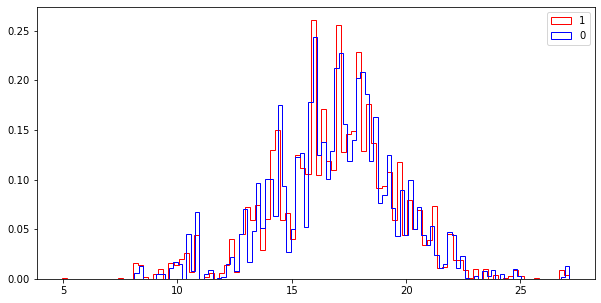

income_household_75_to_100


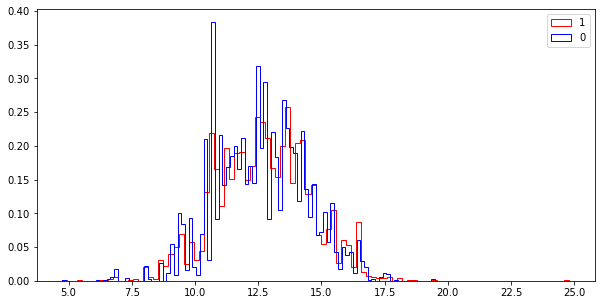

income_household_100_to_150


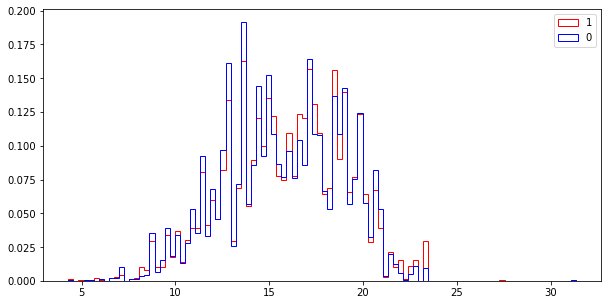

income_household_150_over


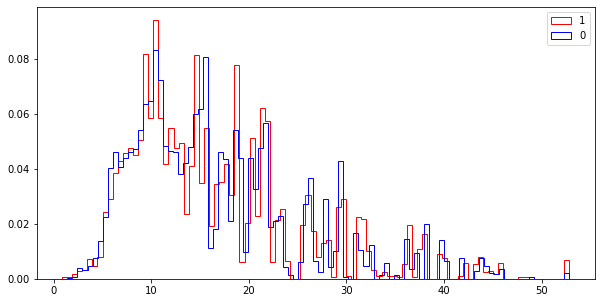

income_household_six_figure


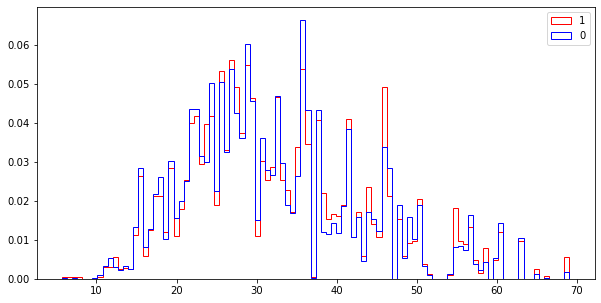

income_individual_median


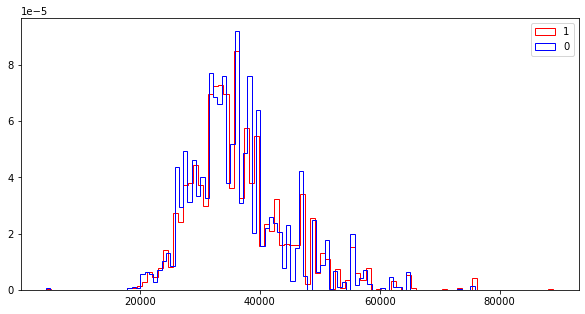

home_ownership


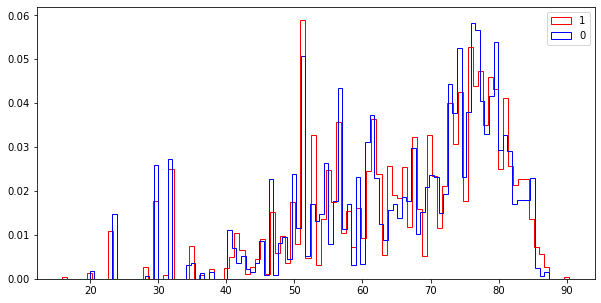

housing_units


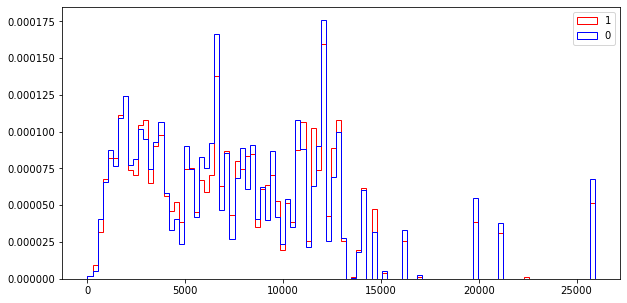

home_value


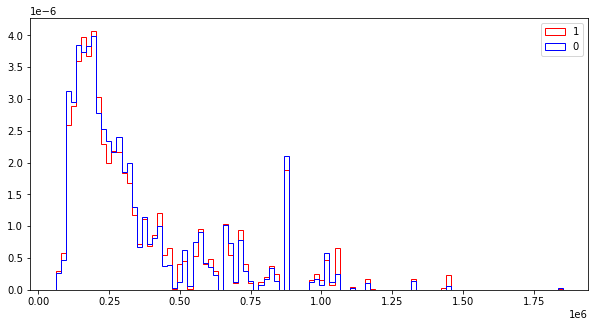

rent_median


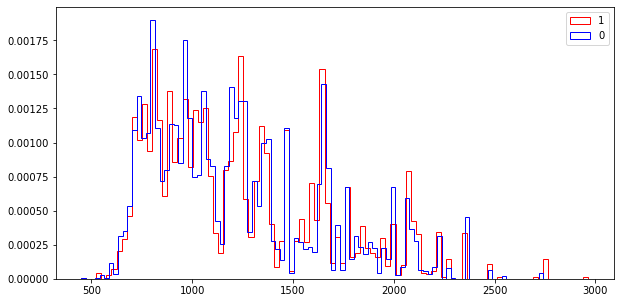

rent_burden


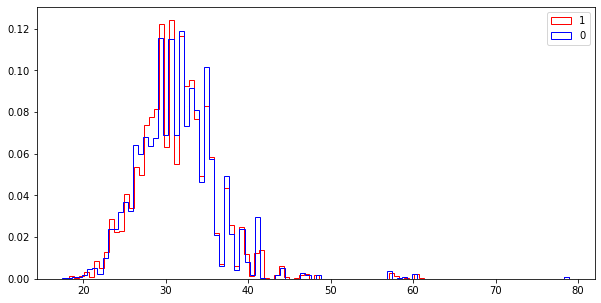

education_less_highschool


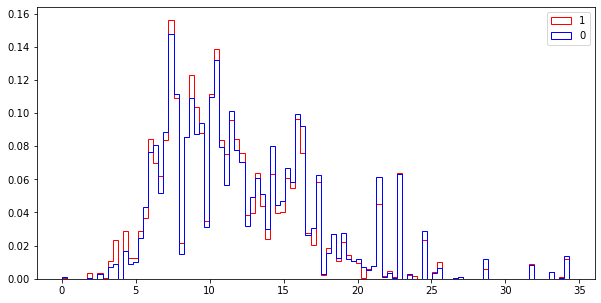

education_highschool


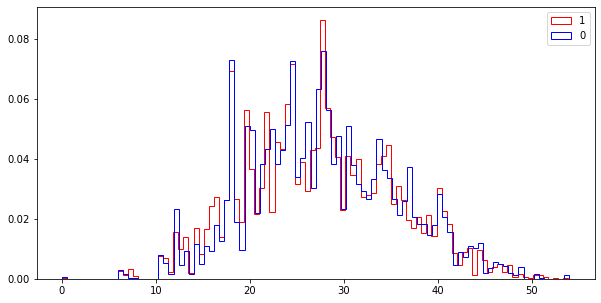

education_some_college


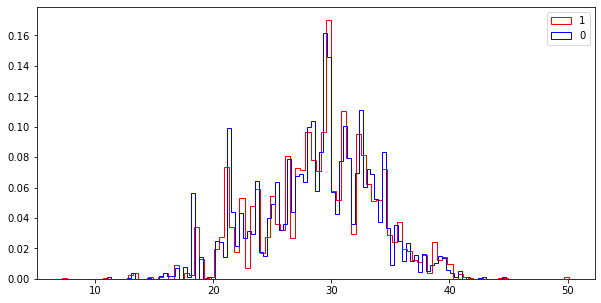

education_bachelors


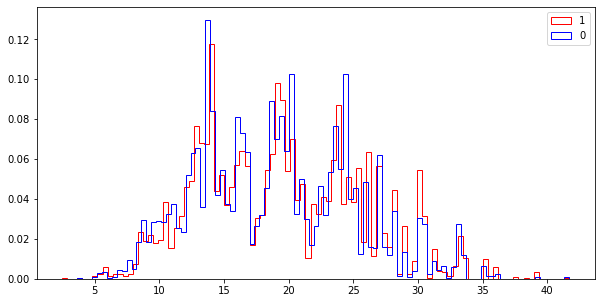

education_graduate


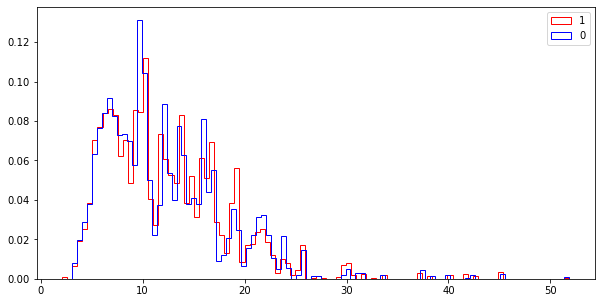

education_college_or_above


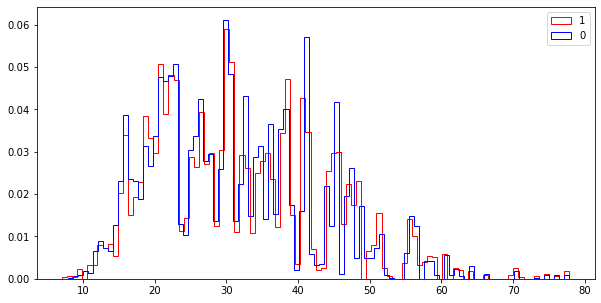

education_stem_degree


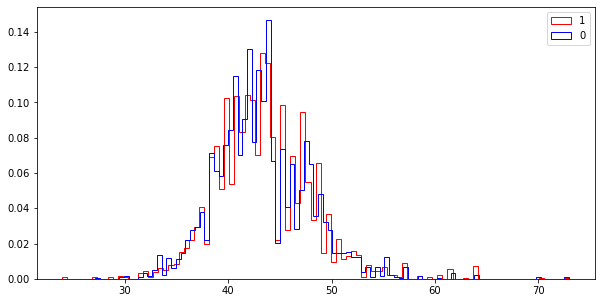

labor_force_participation


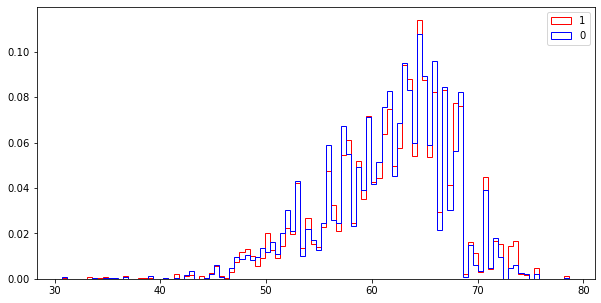

unemployment_rate


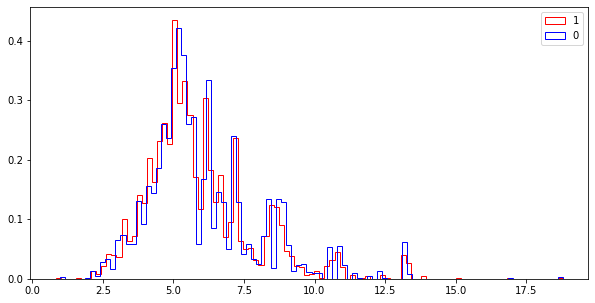

self_employed


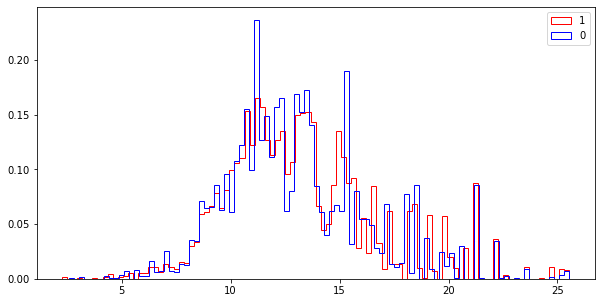

farmer


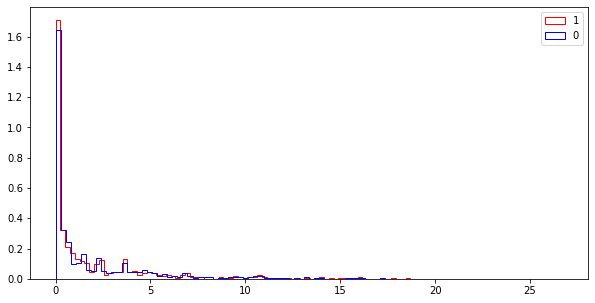

race_white


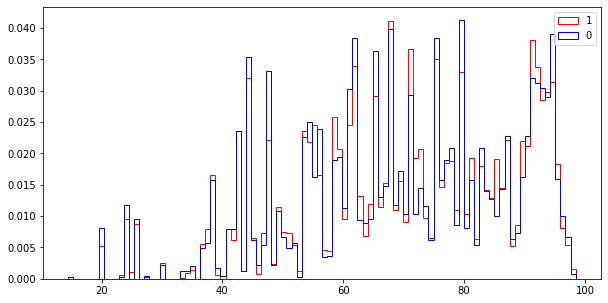

race_black


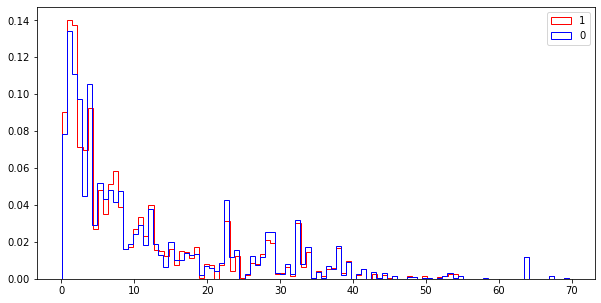

race_asian


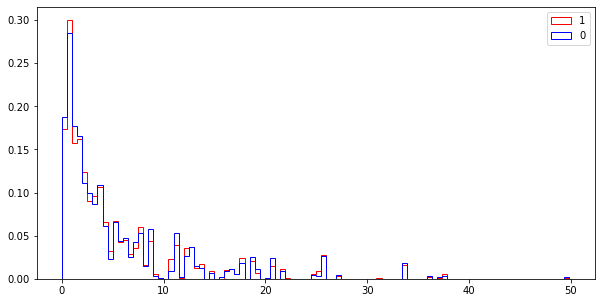

race_native


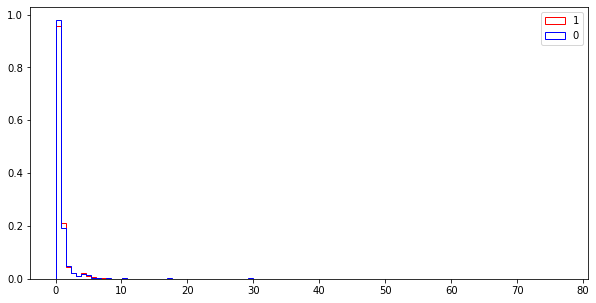

race_pacific


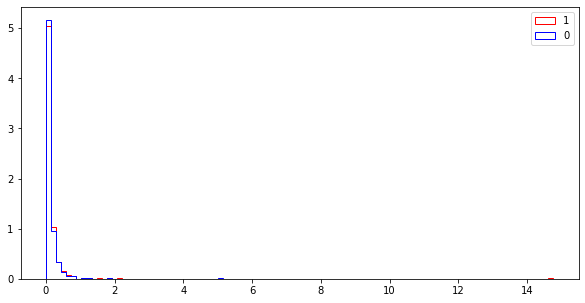

race_other


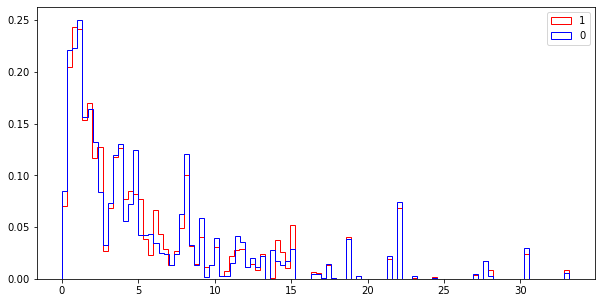

race_multiple


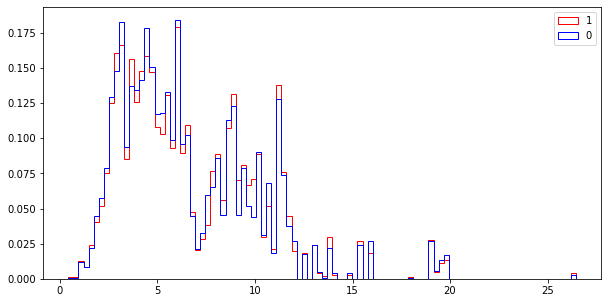

hispanic


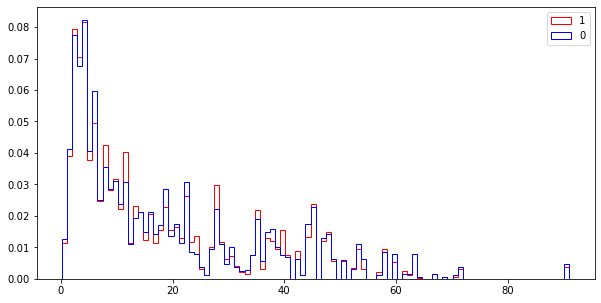

disabled


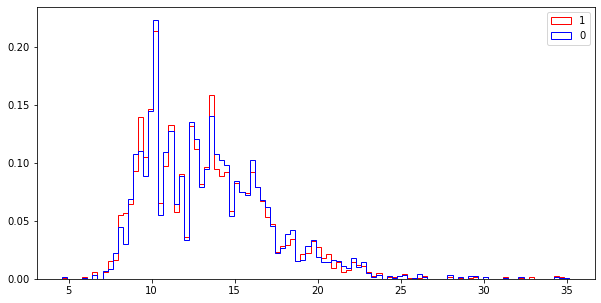

poverty


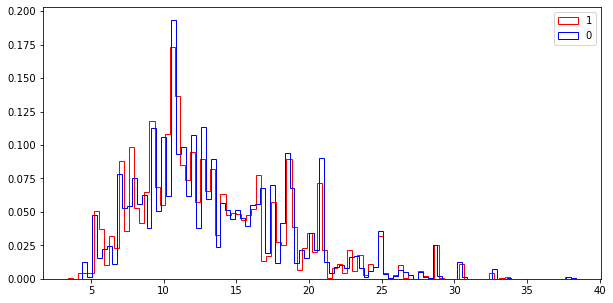

limited_english


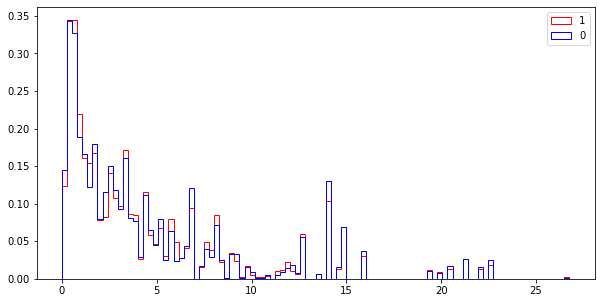

commute_time


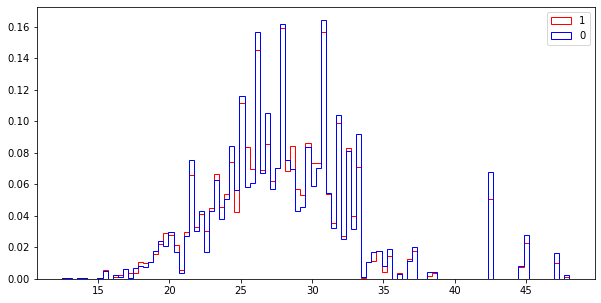

health_uninsured


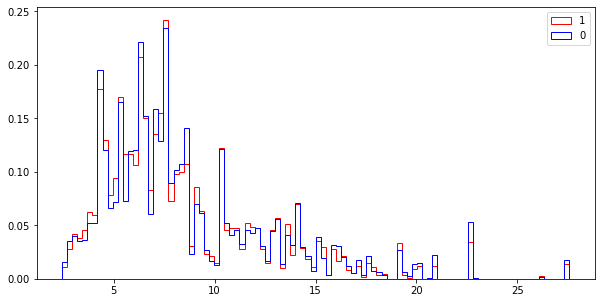

veteran


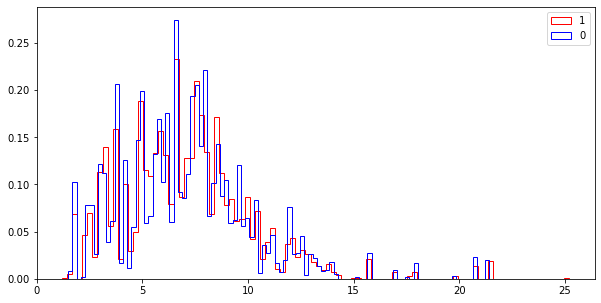

Ozone


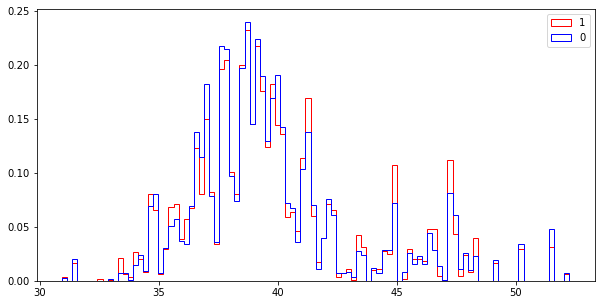

PM25


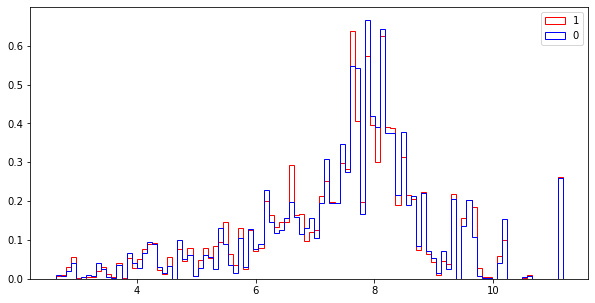

N02


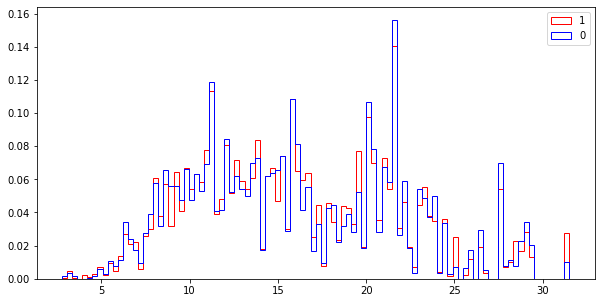

In [8]:
for Feat in FeatNames:
    print(Feat)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_1[Feat]),bins=100,histtype="step", color="red",label="1",density=1, stacked=True)
    plt.hist(np.array(df_0[Feat]),bins=100,histtype="step", color="blue", label="0",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

### Note:
I see outliers, however, clipping them may result in substantial information loss especially for healthcare data. Choose a ML model that is not sensitive to outliers. Scaling may also reduce impact of outliers.

In [9]:
def compare_features_numerical(df,target_col='DiagPeriodL90D',logscale=False):
    # Divide the data into separate dfs for the two categories
    df_0=df[df[target_col]==0]
    df_1=df[df[target_col]==1]
    
    print("Number of catogory 0:",df_0.shape[0])
    print("Number of catogory 1:",df_1.shape[0])
    
    # Make a grid of plots
    N_Features = df.shape[1] - 1 # skip over the target col
    N_X= math.ceil(math.sqrt(N_Features))
    N_Y= math.floor(math.sqrt(N_Features))
    if N_X*N_Y<N_Features:
        N_Y+=1

    print("Found",N_Features,"features. Creating grid of",N_X,"by",N_Y)
    
    # Histogram Features
    plt.figure(figsize=(50,50))

    for i,column in enumerate(df_0.columns):
            
        KS_test=scipy.stats.kstest(df_0[column],df_1[column]).statistic
        KS_test_str="{KS:.3f}".format(KS=KS_test)
        print(column,"KS Distribution Similarity Test:", KS_test_str)
        
        plt.subplot(N_X,N_Y,i+1)
        plt.title(KS_test_str)
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column],bins=100, histtype="step", color="red",label="0",density=1, stacked=True)
        plt.hist(df_1[column],bins=100, histtype="step", color="blue",label="1",density=1, stacked=True)
        plt.legend()
        plt.xlabel(column)
        
    plt.tight_layout()
    plt.show()

Number of catogory 0: 4846
Number of catogory 1: 8060
Found 71 features. Creating grid of 9 by 8
patient_id KS Distribution Similarity Test: 0.018
patient_zip3 KS Distribution Similarity Test: 0.042
patient_age KS Distribution Similarity Test: 0.059
bmi KS Distribution Similarity Test: 0.050
population KS Distribution Similarity Test: 0.015
density KS Distribution Similarity Test: 0.019
age_median KS Distribution Similarity Test: 0.015
age_under_10 KS Distribution Similarity Test: 0.018
age_10_to_19 KS Distribution Similarity Test: 0.022
age_20s KS Distribution Similarity Test: 0.015
age_30s KS Distribution Similarity Test: 0.028
age_40s KS Distribution Similarity Test: 0.034
age_50s KS Distribution Similarity Test: 0.022
age_60s KS Distribution Similarity Test: 0.016
age_70s KS Distribution Similarity Test: 0.016
age_over_80 KS Distribution Similarity Test: 0.015
male KS Distribution Similarity Test: 0.015
female KS Distribution Similarity Test: 0.016
married KS Distribution Similarit

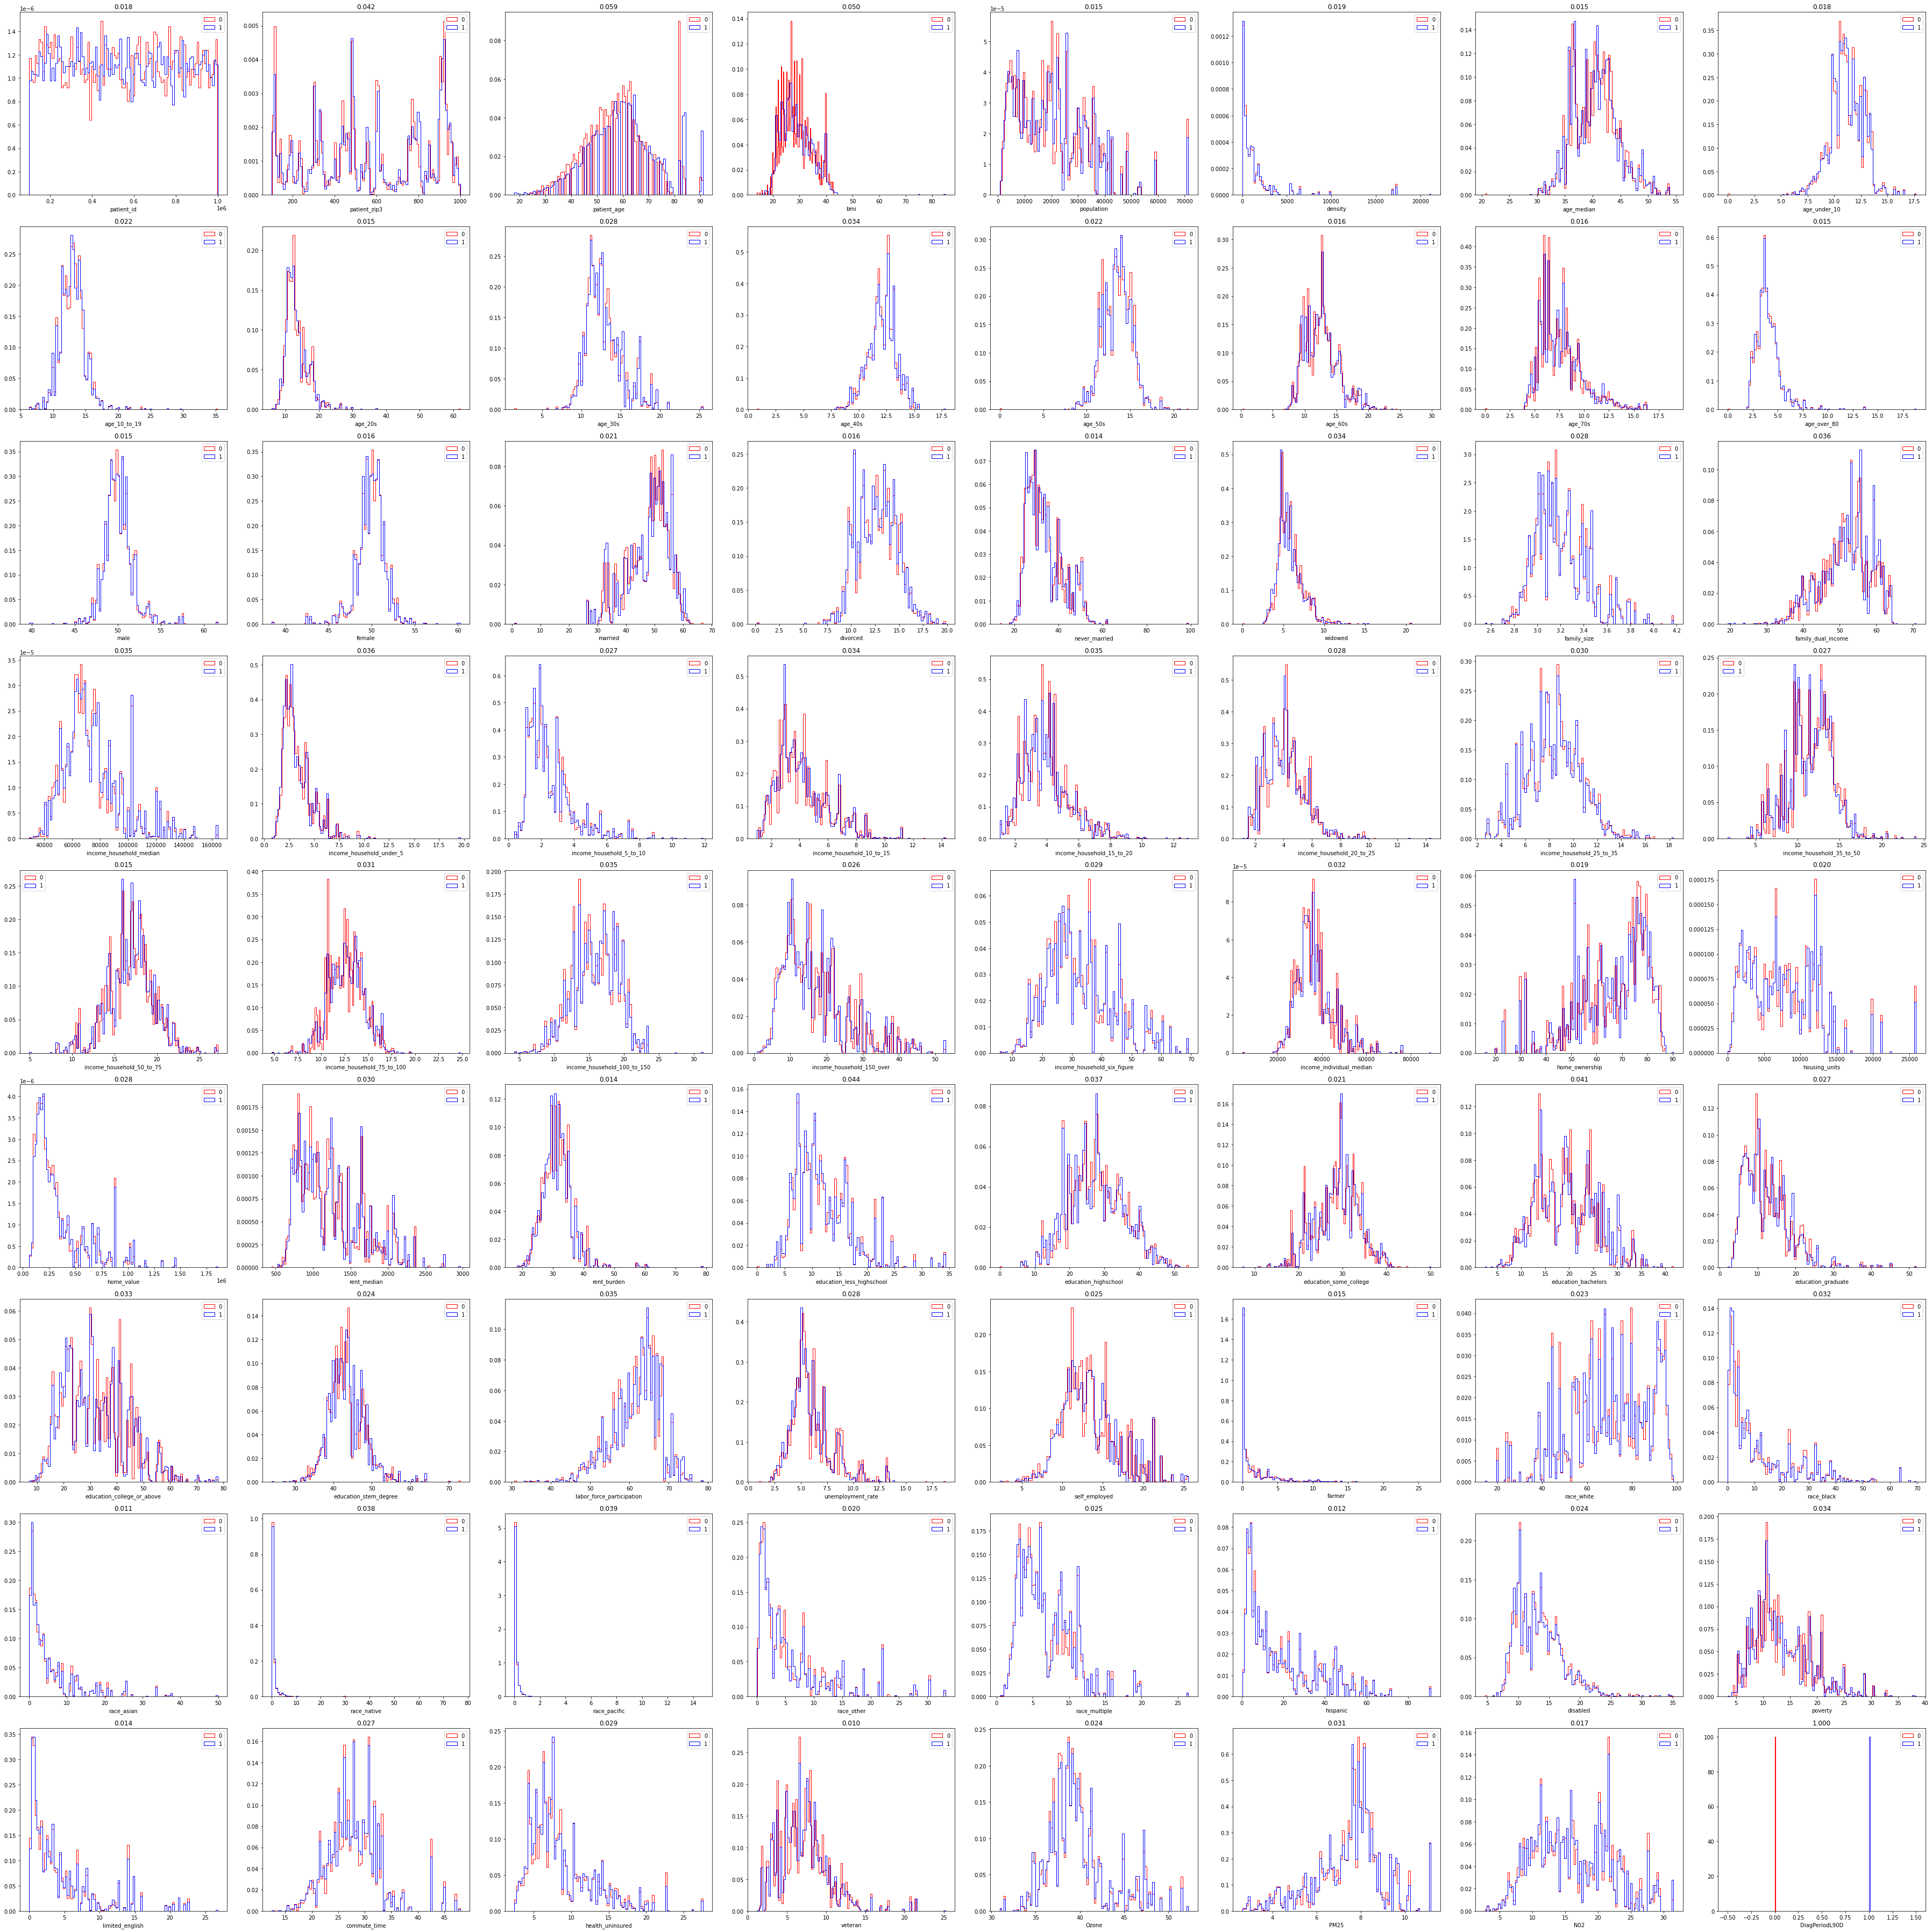

In [10]:
compare_features_numerical(num_df)

#### Note:
ValueError: autodetected range of [nan, nan] is not finite. Problem with NaN values. Data is not properly preprocessed which is causing an issue with visualization. Data excludes feature counts made with merged_df.

Most features that KS examined are under 0.05 making the lack of fit significant. Patient_age (59) is over that threshold and is the most fit feature, bmi (0.50) is the second highest.

In [11]:
c_df = num_df.corr()
c_df

patient_id  patient_zip3  patient_age       bmi  \
patient_id                     1.000000      0.020582     0.008109 -0.005282   
patient_zip3                   0.020582      1.000000    -0.062820 -0.048912   
patient_age                    0.008109     -0.062820     1.000000 -0.063885   
bmi                           -0.005282     -0.048912    -0.063885  1.000000   
population                     0.001216      0.098969    -0.018048 -0.037956   
density                       -0.007420     -0.196672    -0.002532 -0.003744   
age_median                     0.005052     -0.148139     0.040121 -0.023318   
age_under_10                  -0.004164      0.057007    -0.026532  0.056463   
age_10_to_19                  -0.018012      0.032373    -0.029747  0.006254   
age_20s                       -0.003972      0.095140    -0.020619  0.001980   
age_30s                        0.005831      0.166875    -0.023544 -0.005806   
age_40s                        0.004069      0.077965    -0.025756 -0.047308   
age_50s                        0.004899     -0.210722     0.022877 -0.042387   
age_60s                        0.003589     -0.087124     0.037730  0.002343   
age_70s                        0.007134     -0.085961     0.028956  0.012093   
age_over_80                    0.002409     -0.160522     0.046018  0.004299   
male                           0.003041      0.317598    -0.020105 -0.025386   
female                        -0.003039     -0.317619     0.020105  0.025384   
married                       -0.004366      0.061936    -0.001737 -0.035566   
divorced                       0.006926     -0.050734     0.029565  0.078860   
never_married                  0.000555      0.010324    -0.008728 -0.002234   
widowed                        0.009125     -0.288334     0.014652  0.071734   
family_size                    0.006695      0.272980    -0.062725 -0.019539   
family_dual_income            -0.012072      0.050778    -0.003724 -0.070796   
income_household_median       -0.008302      0.170538    -0.035835 -0.104458   
income_household_under_5       0.009876     -0.031459    -0.008010  0.048758   
income_household_5_to_10       0.013046     -0.155734     0.021896  0.074024   
income_household_10_to_15      0.012808     -0.114811     0.005845  0.078255   
income_household_15_to_20      0.009837     -0.165335     0.026048  0.079698   
income_household_20_to_25      0.002511     -0.142458     0.011125  0.088759   
income_household_25_to_35      0.007380     -0.148465     0.026959  0.094422   
income_household_35_to_50     -0.002431     -0.182240     0.035278  0.095446   
income_household_50_to_75      0.003612     -0.088740     0.036881  0.074977   
income_household_75_to_100    -0.007589     -0.056723     0.028088  0.006159   
income_household_100_to_150   -0.003673      0.141629    -0.007940 -0.080850   
income_household_150_over     -0.007451      0.176768    -0.039970 -0.104607   
income_household_six_figure   -0.007034      0.182416    -0.034375 -0.106262   
income_individual_median      -0.009741      0.120254    -0.027451 -0.088923   
home_ownership                -0.002885     -0.127049     0.030107 -0.002096   
housing_units                  0.000519      0.043896    -0.009498 -0.033363   
home_value                    -0.002896      0.341977    -0.053114 -0.090552   
rent_median                   -0.003639      0.302714    -0.050153 -0.097696   
rent_burden                    0.010476      0.020499    -0.012694 -0.026373   
education_less_highschool      0.018881      0.170938    -0.061919  0.045221   
education_highschool           0.000899     -0.354738     0.028554  0.090453   
education_some_college         0.002818      0.262728     0.030824  0.011206   
education_bachelors           -0.006018      0.145472    -0.003132 -0.088354   
education_graduate            -0.013587     -0.038093    -0.006955 -0.075334   
education_college_or_above    -0.010132      0.057756    -0.005214 -0.085395   
education_stem_degree        

In [12]:
c_matrix = c_df.to_numpy()

for i in range(c_matrix.shape[0]): c_matrix[i][i]=0.

In [13]:
from collections import OrderedDict
corr_dict=OrderedDict()

for i in range(c_matrix.shape[0]):
    for j in range(c_matrix.shape[0]):
        corr_dict[(i,j)]=c_matrix[i][j]

(array([  36.,  222.,  410.,  648., 1102., 1342.,  678.,  460.,  222.,
          64.]),
 array([-0.99999997, -0.80171523, -0.60343049, -0.40514576, -0.20686102,
        -0.00857629,  0.18970845,  0.38799318,  0.58627792,  0.78456266,
         0.98284739]),
 <BarContainer object of 10 artists>)

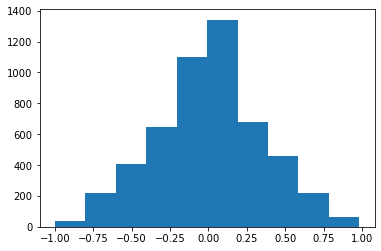

In [14]:
corr_dict_sorted = OrderedDict(sorted(corr_dict.items(),
                                      key=lambda x: math.fabs(x[1])))

plt.hist(corr_dict_sorted.values())

## 4 - Data Prep

In [15]:
print(f"Before - training shape: {df_TR.shape}, test shape: {df_TE.shape}")

Before - training shape: (12906, 83), test shape: (5792, 82)


### 4.1 - Impute

(1) Potential collections:
- age group using patient_age
- environment using air quality toxins (Ozone, PM25, NO2)

(2) As said before during loading the data:
- patient_gender and metastatic_first_novel_treatment_type has only one unique value and should be removed.
- metastatic_first_novel_treatment (99%) has a significant amount of missing values and will be dropped.
- education_college_or_above and income_household_six_figure will be dropped due to redundancy.
- BMI (69%) and patient_race (49%) have a significant amount of missing values; decide on method of imputation.

(3) Other Missing Values (>50):
- payer_type
- patient_state (zip3 has no missing values and is a sufficient way of providing information about a patient's location in healthcare -- this col will be dropped, no need for imputation)
- Region
- Division


(4 (will be dropped in section 1)) The rest of the missing values (<30) in the other features' rows will be dropped.

### 4.1.1 - Group Collections

In [16]:
# groups 3 different air quality features into one group that represents the air pollutants/toxins
def combine_air_quality(df):
    
    df['pollutants'] = df['Ozone'] * df['PM25'] * df['N02']
    return df

# creates age group column to assist imputation
# patient_age was the highest corr feature and is best connected with the other features
def age_group_col(df):
    
    # lookup patient's age and round to the nearest 10
    df['age_group'] = round(df['patient_age'], -1) + 10 # added 10 shifts rounded age to stop intial age = 0.
    df['age_group'].value_counts() 
    return df

### 4.1.2 - Drop Missing Values

In [17]:
# drop the columns mentioned above
## dropped patient_id as it provides nothing for the machine to learn -- unique value
## dropped air quality values since they were merged into a group representing a single feature

dropped_col = ['patient_gender','metastatic_first_novel_treatment_type',
               'metastatic_first_novel_treatment','patient_state','patient_id','income_household_six_figure',
              'education_college_or_above','Ozone','PM25','N02']

# drops entire col/feature
def drop_col(df, dropped_col):

    df = df.drop(columns=dropped_col)
    print(f"\nDropped columns '{dropped_col}'")
    return df

### Note:
Reminder to place the drop_col first to reduce computation power needed and place drop_na last so the features will run through their appropriate imputation methods first before prematurally dropping thier NaN values.

### 4.1.3 - Imputation Methods

In [18]:
# aggregate function that fills the NaN values of target col 
# with the average of the grouped col -- not an imputation
def agg(df,group_col,input_col,method='mean'):
    result = {}
    for group in df[group_col].unique():
        
        # filters df for selected goup
        group_df = df[df[group_col] == group]
        
        # converts 'input_col' to numeric, handles NaN values by skipping them
        numeric_col = pd.to_numeric(group_df[input_col], errors='coerce')
        
        if method == 'mean':
            # calculates mean numeric values and automatically skips NaN values
            result[group] = numeric_col.mean()
        elif method == 'mode':
            result[group] = group_df[input_col].mode()[0]
        elif method == 'median':
            result[group] = group_df[input_col].median()
        else:
            raise ValueError('Incorrect imputation method')
    return result

In [19]:
# impute bmi by the mean of the age group
def impute_bmi(df):
    
    # NaN values before imputation
    # print('Number of missing bmi - Before:',df['bmi'].isna().sum()) # must be placed before since imputation ignores NaN values
    
    # in case age_group col wasn't called and placed correctly, adds age_group col
    if 'age_group' not in df.columns:
        df = age_group_col(df)
        
    # aggregates mean bmi for each age group
    bmi_by_age_group = agg(df,'age_group','bmi',method='mean') # aggregates bmi by age group
    df['bmi'] = df['bmi'].fillna(df['age_group'].map(bmi_by_age_group)) # fills missing bmi with mean bmi for age group
    print('Number of missing bmi - After:',df['bmi'].isna().sum()) # NaN values after imputation
    return df

# impute race by the mode of the age group
def impute_race(df):
    
    if 'age_group' not in df.columns:
        df = age_group_col(df)
        
    race_by_age_group = agg(df,'age_group','patient_race',method='mode')
    print('Number of missing patient_race - Before:',df['patient_race'].isna().sum())
    df['patient_race'] = df['patient_race'].fillna(df['age_group'].map(race_by_age_group))
    print('Number of missing patient_race - After:',df['patient_race'].isna().sum())
    return df

# impute payer type by the mode of the age group
def impute_payer(df):
    
    if 'age_group' not in df.columns:
        df = age_group_col(df)
        
    payer_by_age_group = agg(df,'age_group','payer_type',method='mode')
    print('Number of missing payer_type - Before:',df['payer_type'].isna().sum())
    df['payer_type'] = df['payer_type'].fillna(df['age_group'].map(payer_by_age_group))
    print('Number of missing payer_type - After:',df['payer_type'].isna().sum())
    return df

def impute(df):
    df = impute_bmi(df)
    df = impute_race(df)
    df = impute_payer(df)
    return df

### 4.2 - Clean

In [20]:
def clean(df):
    df_clean = df.copy()
    
    # print intial df before cleaning is done
    print('\nData info:')
    print(f"{df_clean.info()}")
    
    # add pollutants col
    df_clean = combine_air_quality(df_clean)
    
    # list of cols to drop
    dropped_cols = ['patient_gender','metastatic_first_novel_treatment_type','metastatic_first_novel_treatment',
                    'patient_state','income_household_six_figure','education_college_or_above',
                    'Ozone','PM25','N02']
    # drop cols
    df_clean = drop_col(df_clean, dropped_cols)
    
    #add age group col
    df_clean = age_group_col(df_clean)
    
    # print df after col changes (dropped & added) for debugging
    print(f'\n --- Data info after dropping columns: ---\n')
    print(df_clean.info())

    
    print('\n---- IMPUTATIONS ----\n') # header between two outputs for better readability
    print('Number of missing bmi - Before:',df['bmi'].isna().sum())
    # impute missing values
    df_clean = impute(df_clean)
    
    # drop rows with missing values
    df_clean.dropna(inplace=True)
    
    # normalize data
    #df_clean = norm(df_clean)
    
    return df_clean

In [21]:
print('---- TRAINING DATASET ----\n')
cleaned_train_df = clean(df_TR)

print('\n---- TEST DATASET ----\n')
cleaned_test_df = clean(df_TE)

# training and test shape after data is cleaned
print(f"\nAfter - training shape: {cleaned_train_df.shape}, test shape: {cleaned_test_df.shape}")

---- TRAINING DATASET ----


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_co

### 4.3 - Preprocess (Encode & Rescale)

In [22]:
# categorical cols
cat_cols = list(cleaned_train_df.columns[cleaned_train_df.dtypes == 'object'])

cleaned_train_df[cat_cols]

patient_race  payer_type breast_cancer_diagnosis_code  \
0            White    MEDICAID                       C50919   
1            White  COMMERCIAL                       C50411   
2            White  COMMERCIAL                       C50112   
3            White  COMMERCIAL                       C50212   
4            White  COMMERCIAL                         1749   
...            ...         ...                          ...   
12901        White  COMMERCIAL                       C50411   
12902        White  COMMERCIAL                       C50912   
12903        White  COMMERCIAL                       C50912   
12904        White  COMMERCIAL                         1749   
12905     Hispanic    MEDICAID                       C50412   

                            breast_cancer_diagnosis_desc  \
0      Malignant neoplasm of unsp site of unspecified...   
1      Malig neoplm of upper-outer quadrant of right ...   
2      Malignant neoplasm of central portion of left ...   
3      Malig neoplasm of upper-inner quadrant of left...   
4      Malignant neoplasm of breast (female), unspeci...   
...                                                  ...   
12901  Malig neoplm of upper-outer quadrant of right ...   
12902  Malignant neoplasm of unspecified site of left...   
12903  Malignant neoplasm of unspecified site of left...   
12904  Malignant neoplasm of breast (female), unspeci...   
12905  Malig neoplasm of upper-outer quadrant of left...   

      metastatic_cancer_diagnosis_code     Region            Division  
0                                C7989       West             Pacific  
1                                 C773       West             Pacific  
2                                 C773      South  West South Central  
3                                 C773       West             Pacific  
4                                 C773       West            Mountain  
...                                ...        ...                 ...  
12901                             C773    Midwest  East North Central  
12902                             C773       West             Pacific  
12903                            C7931       West             Pacific  
12904                             C773  Northeast     Middle Atlantic  
12905                             C773      South      South Atlantic  

[12822 rows x 7 columns]

In [23]:
def onehot_encode(df):
    # categorical cols
    cat_cols = list(df.columns[df.dtypes == 'object'])
    
    encoder = OneHotEncoder()
    encoded_cols = encoder.fit_transform(df[cat_cols]) # fit and transform cat cols
    encoded_df = pd.DataFrame(encoded_cols.toarray(),df[cat_cols]) # new df w/ encoded cols
    df.drop(columns=cat_cols, inplace=True) # drop original cat cols
    df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1) # concatenate encoded cols with original df
    
    return df

In [24]:
# normalizing

def norm(df):
    df.columns = df.columns.astype(str)
    num_cols = df.select_dtypes(include=['number']).columns
    scaler = MinMaxScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

# standardizing -- if needed insert here


In [25]:
# applies encoding to df

def encode(df):
    df_encode = df.copy()
    
    df_encode = onehot_encode(df_encode)
    print(df_encode) # debug/check
    
    return df_encode

In [26]:
# applies rescaling and encoding to df

def scale(df):
    
    # encodes categorical columns to df
    df_encode = onehot_encode(df.copy()) 
    #print(df_encode.info()) # debug/check
    
    # applies normalizing
    df_scale = norm(df_encode)
    
    #applies standardizing
    #df_scale = standard(df_scale) 
    
    return df_scale

In [27]:
# scales data that includes: one-hot encoding, cleaned (missing values & col changes), and normalized.

prep_train_df = scale(cleaned_train_df)

prep_test_df = scale(cleaned_test_df)

In [28]:
# scaled data w/o the normalization. Includes clean and encoding data.

print('---- TRAINING DATASET ----\n')
encode_train_df = encode(cleaned_train_df)

print('\n---- TEST DATASET ----\n')
encode_test_df = encode(cleaned_test_df)

---- TRAINING DATASET ----

       patient_id  patient_zip3  patient_age        bmi   population  \
0          475714           924           84  27.526253  31437.75000   
1          349367           928           62  28.490000  39121.87879   
2          138632           760           43  38.090000  21996.68333   
3          617843           926           45  28.998545  32795.32558   
4          817482           836           55  29.432855  10886.26000   
...           ...           ...          ...        ...          ...   
12817      674178           436           50  32.110000  19413.05882   
12818      452909           945           50  29.055611  30153.87952   
12819      357486           926           61  29.240000  32795.32558   
12820      935417           112           37  31.000000  71374.13158   
12821      179597           336           29  27.905465  30205.48148   

            density  age_median  age_under_10  age_10_to_19    age_20s  \
0       1189.562500   30.642857  

      patient_id  patient_zip3  patient_age        bmi    population  \
0         573710           467           54  28.870556   5441.435484   
1         593679           337           52  28.870556  19613.820510   
2         184532           917           61  29.495441  43030.500000   
3         447383           917           64  29.495441  43030.500000   
4         687972           900           40  23.000000  36054.117650   
...          ...           ...          ...        ...           ...   
5751      977076           404           63  29.600000   7765.000000   
5752      922960           507           69  29.007987  19332.750000   
5753      759690           980           84  28.280000  28628.290910   
5754      911717           740           58  29.495441   9716.970149   
5755      327597           114           83  27.339125  31657.461540   

          density  age_median  age_under_10  age_10_to_19    age_20s  \
0       85.620968   40.880328     12.732258     14.088710  10.6

### 4.4 - Visualize

Number of catogory 0: 4814
Number of catogory 1: 8008
Found 75 features. Creating grid of 9 by 9
patient_id KS Distribution Similarity Test: 0.016
patient_race KS Distribution Similarity Test: 0.003
payer_type KS Distribution Similarity Test: 0.031
patient_zip3 KS Distribution Similarity Test: 0.043
patient_age KS Distribution Similarity Test: 0.059
bmi KS Distribution Similarity Test: 0.023
breast_cancer_diagnosis_code KS Distribution Similarity Test: 0.524
breast_cancer_diagnosis_desc KS Distribution Similarity Test: 0.234
metastatic_cancer_diagnosis_code KS Distribution Similarity Test: 0.099
Region KS Distribution Similarity Test: 0.036
Division KS Distribution Similarity Test: 0.027
population KS Distribution Similarity Test: 0.015
density KS Distribution Similarity Test: 0.020
age_median KS Distribution Similarity Test: 0.015
age_under_10 KS Distribution Similarity Test: 0.018
age_10_to_19 KS Distribution Similarity Test: 0.021
age_20s KS Distribution Similarity Test: 0.016
age_3

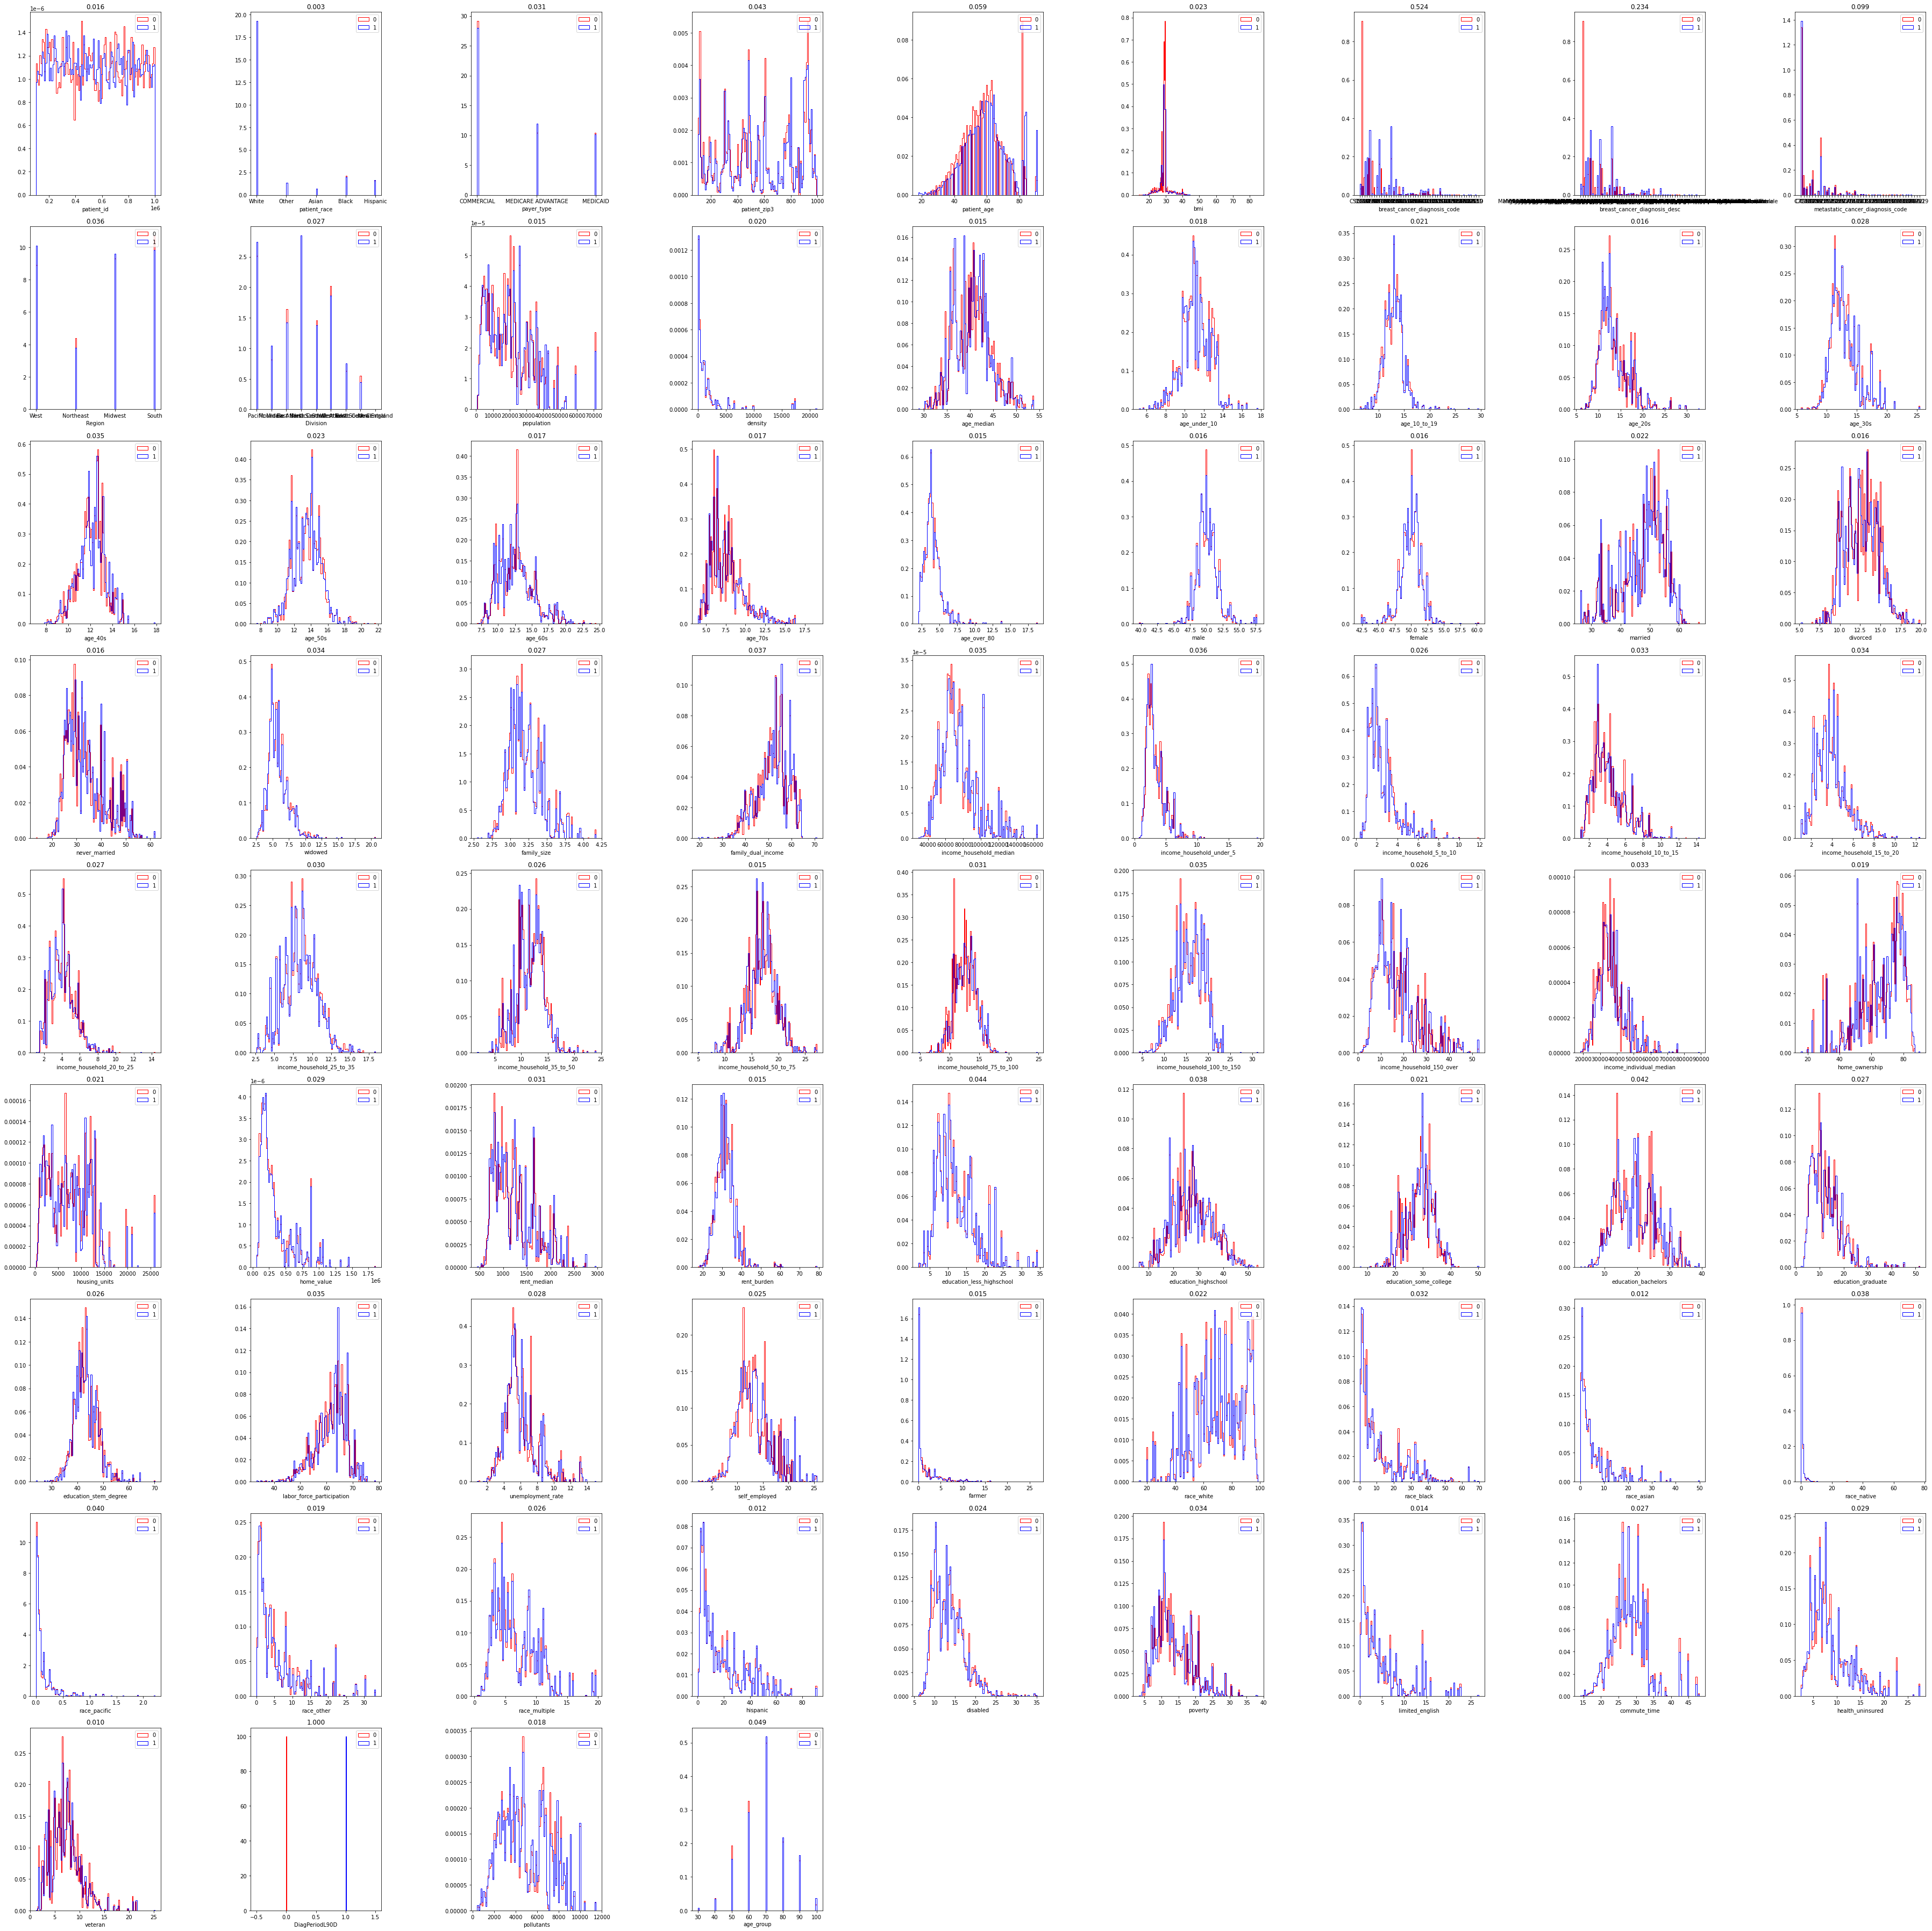

In [29]:
compare_features_binary(cleaned_train_df)

In [30]:
#compare_features_binary(prep_train_df)

### Note:
This visual and KS distribution is not useful for comparison. Test if normalization was applied appropriately.

In [31]:
c_clean_dfTR = prep_train_df.corr()
c_clean_dfTR

patient_id  patient_zip3  patient_age       bmi  \
patient_id                     1.000000      0.018559     0.008311 -0.000488   
patient_zip3                   0.018559      1.000000    -0.063854 -0.013392   
patient_age                    0.008311     -0.063854     1.000000 -0.125949   
bmi                           -0.000488     -0.013392    -0.125949  1.000000   
population                     0.000842      0.100505    -0.018523 -0.019907   
density                       -0.007111     -0.197270    -0.002521 -0.006312   
age_median                     0.004254     -0.148168     0.038998 -0.016000   
age_under_10                  -0.004233      0.062251    -0.026825  0.034993   
age_10_to_19                  -0.016247      0.034184    -0.028972  0.008484   
age_20s                       -0.002877      0.090206    -0.019147  0.000847   
age_30s                        0.005505      0.171139    -0.024197 -0.001706   
age_40s                        0.003221      0.085418    -0.027168 -0.018437   
age_50s                        0.003808     -0.208675     0.021877 -0.022690   
age_60s                        0.002126     -0.088527     0.037117 -0.003384   
age_70s                        0.006722     -0.086257     0.027925  0.003045   
age_over_80                    0.002786     -0.160485     0.045067 -0.004122   
male                           0.001835      0.316981    -0.018865 -0.010524   
female                        -0.001832     -0.317003     0.018865  0.010522   
married                       -0.005618      0.065991    -0.002664 -0.014242   
divorced                       0.006785     -0.047840     0.028242  0.037294   
never_married                  0.001866      0.006295    -0.007412 -0.002791   
widowed                        0.008638     -0.291084     0.013943  0.034301   
family_size                    0.006068      0.271396    -0.063017  0.000220   
family_dual_income            -0.012970      0.049759    -0.003272 -0.034159   
income_household_median       -0.009321      0.170379    -0.035898 -0.049036   
income_household_under_5       0.010522     -0.031381    -0.007726  0.022673   
income_household_5_to_10       0.013372     -0.157900     0.021826  0.033042   
income_household_10_to_15      0.014031     -0.113492     0.006153  0.034942   
income_household_15_to_20      0.011444     -0.165374     0.025940  0.033643   
income_household_20_to_25      0.004100     -0.140806     0.011356  0.042911   
income_household_25_to_35      0.008865     -0.147259     0.027066  0.046000   
income_household_35_to_50     -0.001569     -0.182004     0.034961  0.046243   
income_household_50_to_75      0.004092     -0.088508     0.036529  0.033117   
income_household_75_to_100    -0.008492     -0.058024     0.028509  0.003699   
income_household_100_to_150   -0.005216      0.140447    -0.007878 -0.036977   
income_household_150_over     -0.008371      0.176697    -0.039996 -0.049791   
income_individual_median      -0.010768      0.122676    -0.027629 -0.041756   
home_ownership                -0.003211     -0.126354     0.030338 -0.002206   
housing_units                  0.000255      0.045571    -0.009856 -0.018685   
home_value                    -0.003992      0.340075    -0.053823 -0.040554   
rent_median                   -0.004767      0.301740    -0.050984 -0.045360   
rent_burden                    0.010059      0.021088    -0.013189 -0.013386   
education_less_highschool      0.019287      0.174714    -0.062786  0.029972   
education_highschool           0.001191     -0.358178     0.028704  0.043365   
education_some_college         0.002298      0.261925     0.030556  0.003319   
education_bachelors           -0.006425      0.145943    -0.002836 -0.045316   
education_graduate            -0.013465     -0.036882    -0.006440 -0.039835   
education_stem_degree         -0.012057      0.349517    -0.029433 -0.042756   
labor_force_participation     -0.008679      0.047493    -0.004509 -0.022355   
unemployment_rate            

## 5 - Save Cleaned Dataset

In [32]:
prep_train_df.to_csv('prep_train_data.csv', index=False)
print('train dataset has been saved.')

prep_test_df.to_csv('prep_test_data.csv', index=False)
print('test dataset has been saved.')

train dataset has been saved.
test dataset has been saved.


In [33]:
#This dataset includes the imputed missing values and dropped cols. Does not include normalized and one-hot encoded.
cleaned_train_df.to_csv('cleaned_train_df.csv', index=False)
print('train dataset has been saved.')

cleaned_test_df.to_csv('cleaned_test_df.csv', index=False)
print('test dataset has been saved.')

train dataset has been saved.
test dataset has been saved.
